In [498]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

os.chdir("/home/william/Documents")

In [499]:
dataset = pd.read_csv('MANU.csv',delimiter=",",decimal=".", index_col=0,parse_dates=['Date'])

In [500]:
training = dataset['2015':'2018'].iloc[:,1:2]
testing = dataset['2019'].iloc[:,1:2]

<ipython-input-500-00bdae0cbc6c>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  testing = dataset['2019'].iloc[:,1:2]


In [501]:
training

,High
Date,
2015-01-02,16.059999
2015-01-05,15.950000
2015-01-06,15.740000
2015-01-07,15.710000
2015-01-08,15.800000
...,...
2018-12-24,18.600000
2018-12-26,18.400000
2018-12-27,18.520000


In [502]:
testing

,High
Date,
2019-01-02,18.820000
2019-01-03,18.690001
2019-01-04,19.040001
2019-01-07,19.559999
2019-01-08,19.549999
...,...
2019-12-24,19.820000
2019-12-26,19.639999
2019-12-27,19.860001


In [503]:
print("Datos sin estandarizar:\n\n",training)
#escalamos los datos
scaler = StandardScaler()
sc_training = scaler.fit_transform(training)

Datos sin estandarizar:

                  High
Date                 
2015-01-02  16.059999
2015-01-05  15.950000
2015-01-06  15.740000
2015-01-07  15.710000
2015-01-08  15.800000
...               ...
2018-12-24  18.600000
2018-12-26  18.400000
2018-12-27  18.520000
2018-12-28  18.840000
2018-12-31  19.090000

[1006 rows x 1 columns]


In [504]:
time_step = 5
X_train = []
Y_train = []
m = len(sc_training)
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0->time_step, 1->time_step+1, 2->time_step+2, etc
    #print("i-time_step: ", i-time_step)
    #print("i:",i)
    X_train.append(sc_training[i-time_step:i,0])
    Y_train.append(sc_training[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
print("Secuencia 1:\n",X_train[0][:])
print("\nSecuencia 2:\n",X_train[1][:])

Secuencia 1:
 [-0.7911129  -0.83785323 -0.92708559 -0.93983307 -0.90159063]

Secuencia 2:
 [-0.83785323 -0.92708559 -0.93983307 -0.90159063 -0.95258055]


In [505]:
#set de testing normalizamos los datos
x_test = testing.values
x_test = scaler.transform(x_test)


X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("\n",X_train[0])

X_train.shape (1001, 5, 1)
X_test.shape (247, 5, 1)

 [[-0.7911129 ]
 [-0.83785323]
 [-0.92708559]
 [-0.93983307]
 [-0.90159063]]


In [506]:
from keras.layers import LSTM

dim_entrada = (X_train.shape[1],1)

modelo = Sequential()

modelo.add(LSTM(units=124, input_shape=dim_entrada))
modelo.add(Dense(units=62, activation='sigmoid'))
modelo.add(Dense(units=1, activation='relu'))

modelo.compile(optimizer='adam', loss='mse')

#resumen del modelo
modelo.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 124)               62496     
_________________________________________________________________
dense_75 (Dense)             (None, 62)                7750      
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 63        
Total params: 70,309
Trainable params: 70,309
Non-trainable params: 0
_________________________________________________________________


In [507]:
modelo.fit(X_train,Y_train,epochs=32,batch_size=500, verbose = 0)

In [508]:
prediccion = modelo.predict(X_test)
# aplicamos la normalización inversa de dicha predicción
prediccion = scaler.inverse_transform(prediccion)

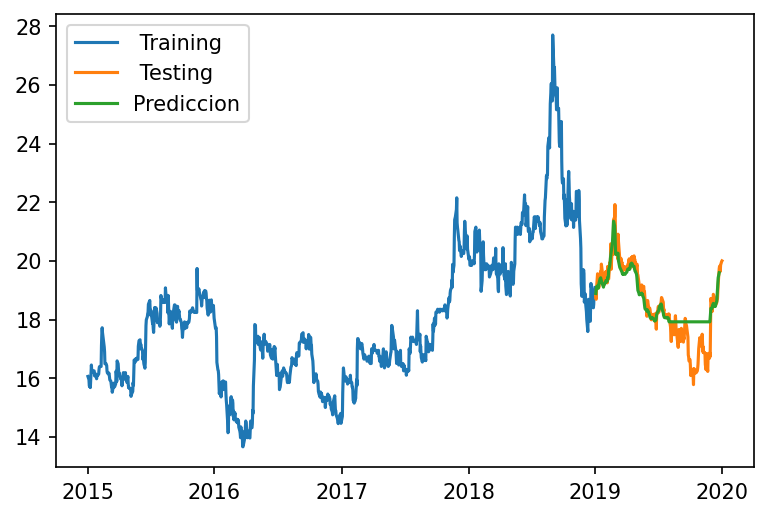

In [509]:
#Gráfico
fig, ax = plt.subplots(1,1, figsize = (6,4), dpi = 150)

plt.plot(training.index, training.values, label = " Training")
plt.plot(testing.index, testing.values, label = " Testing")
plt.plot(testing.index[0:len(X_test)], prediccion, label = "Prediccion")
plt.legend()